In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def hypothesis(X, w):
    """
    Гіпотеза лінійної регресії
    X: матриця ознак (розмірності n_samples x n_features)
    w: вектор параметрів (розмірності n_features x 1)
    """
    return np.dot(X, w)
    

In [3]:
def loss_function(X, y, w):
    """
    Обчислює функцію втрат MSE
    X: матриця ознак
    y: вектор цільової змінної
    w: вектор параметрів
    """
    m = X.shape[0]
    errors = hypothesis(X, w) - y
    return (1 / (2 * m)) * np.sum(errors ** 2)


In [4]:
def gradient_step(X, y, w, alpha):
    """
    Виконує один крок градієнтного спуску
    X: матриця ознак
    y: вектор цільової змінної
    w: вектор параметрів
    alpha: швидкість навчання
    """
    m = X.shape[0]
    errors = hypothesis(X, w) - y
    gradient = (1 / m) * np.dot(X.T, errors)
    return w - alpha * gradient


In [5]:
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    """
    Реалізація градієнтного спуску
    X: матриця ознак
    y: вектор цільової змінної
    alpha: швидкість навчання
    epochs: кількість ітерацій
    """
    X = np.c_[np.ones(X.shape[0]), X]
    
    w = np.zeros(X.shape[1])
    
    losses = []
    
    for i in range(epochs):
        w = gradient_step(X, y, w, alpha)
        loss = loss_function(X, y, w)
        losses.append(loss)
    
    return w, losses


In [6]:
def analytical_solution(X, y):
    """
    Знаходить оптимальні параметри за аналітичним розв'язком
    X: матриця ознак
    y: вектор цільової змінної
    """
    X = np.c_[np.ones(X.shape[0]), X]
    return np.linalg.inv(X.T @ X) @ X.T @ y


In [7]:
data = {
    "Area": [1500, 1800, 2400, 3000, 3600],
    "Bathrooms": [2, 3, 2, 4, 3],
    "Bedrooms": [3, 4, 3, 5, 4],
    "Price": [300000, 350000, 400000, 500000, 600000]
}
df = pd.DataFrame(data)

X = df[["Area", "Bathrooms", "Bedrooms"]].values
y = df["Price"].values

alpha = 0.01
epochs = 1000
w_grad_desc, losses = gradient_descent(X, y, alpha, epochs)

print("Параметри, знайдені градієнтним спуском:", w_grad_desc)

w_analytical = analytical_solution(X, y)
print("Параметри, знайдені аналітичним рішенням:", w_analytical)

model = LinearRegression()
model.fit(X, y)
w_sklearn = np.r_[model.intercept_, model.coef_]

print("Параметри, знайдені за допомогою Scikit-Learn:", w_sklearn)

X_with_bias = np.c_[np.ones(X.shape[0]), X]

print("Функція втрат (градієнтний спуск):", loss_function(X_with_bias, y, w_grad_desc))
print("Функція втрат (аналітичне рішення):", loss_function(X_with_bias, y, w_analytical))
print("Функція втрат (Scikit-Learn):", mean_squared_error(y, model.predict(X)) / 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15508\2938063651.py:10: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum(errors ** 2)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15508\4137681161.py:12: RuntimeWarning: invalid value encountered in subtract
  return w - alpha * gradient


Параметри, знайдені градієнтним спуском: [nan nan nan nan]


LinAlgError: Singular matrix

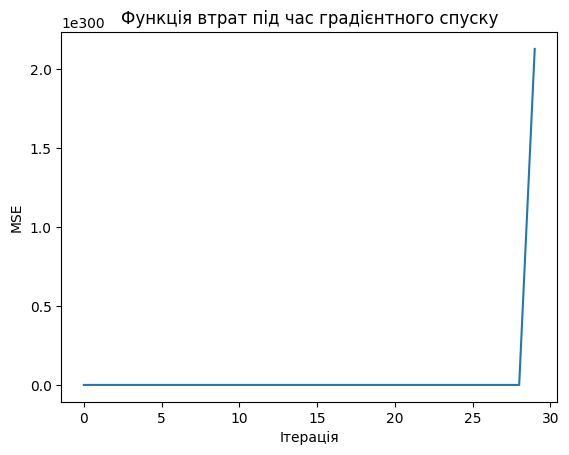

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses)
plt.title("Функція втрат під час градієнтного спуску")
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.show()